# Exercise 1

First of all, we import some usefull libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from colorsys import rgb_to_hsv
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

Then, we import our data, which is in txt format. We also define train/test sets with a $80-20$ proportion.

We remark that we're considering $2$ values in labels (non-skin) as negative.

In [2]:
data = np.loadtxt('data/Skin_NonSkin.txt')

rgb  = data[:,:3]
lbl = data[:,3].astype('int32')

# Non-sin is negative
lbl[lbl == 2] = -1

train_rgb, test_rgb, train_lbl, test_lbl = train_test_split(rgb, lbl, test_size=0.2)

Then, we define our ${\it analize}$ function, which obtain all requested elements and prepare the plot of ROC curves.

In [3]:
def analize(classifier, name, train_X, train_Y, test_X, test_Y):
    # We do the fitting and obtain predicted labels
    classifier.fit(train_X, train_Y)
    predicted = classifier.predict(test_X)
    
    # Then, we calculate confusion matrix with sklearn library, and we calculate rates from it
    confusion_matrix_ = confusion_matrix(test_Y, predicted)
    [[TP, FP], [FN, TN]] = confusion_matrix_
    
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FNR = FN / (FN + TP)
    FPR = FP / (FP+ TN)
    
    # We calculate precision and f1 scores of our classifier
    precision = precision_score(test_Y, predicted, average='macro')
    f1 = f1_score(test_Y, predicted, average='macro')
    
    # We calculate probabilities of each result, so we can calcualte AUC score an ROC curve
    base_proba = classifier.predict_proba(test_X)

    fprs, tprs, thds = roc_curve(test_Y, base_proba[:, 1])
    auc = roc_auc_score(test_Y, base_proba[:, 1])
    plt.plot(fprs, tprs, label = name)
    
    return  pd.DataFrame({'tnr': TNR,
                          'fnr': FNR,
                          'fpr': FPR,
                          'tpr': TPR,
                          'precision' : precision,
                          'f1' : f1,
                          'auc' : auc
                           }, index=[name]), fprs, tprs, thds

Finally, we do a loop over all compared classifiers, so we load data in a data frame and plot all ROC curves in the same graph.

We obtain higher ROC curves than a stright line from [0,0] to [1,1], which is randomly classified. This would be the standart classifier with TPR, FPR = [0, 1], which we're ploting with a red line.

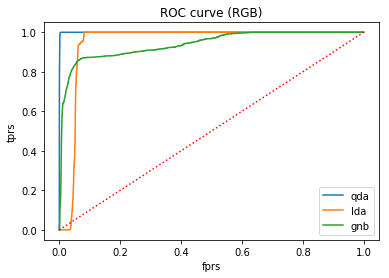

In [4]:
data_frame_RGB = pd.DataFrame()

cls = [QuadraticDiscriminantAnalysis(), LinearDiscriminantAnalysis(), GaussianNB()]
names = ['qda', 'lda', 'gnb']

for i in range(len(names)):
    row, fprs, tprs, thds = analize(cls[i], names[i], train_rgb, train_lbl, test_rgb, test_lbl)
    data_frame_RGB = pd.concat([data_frame_RGB, row])

plt.plot([0, 1], [0, 1], ':r')
plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (RGB)')
plt.legend(loc = 'best')
plt.show()

We can consult here all stored data, in data frame format. We can clearly see that, with this data, ${\it qda}$ is the best classifier.

In [5]:
data_frame_RGB

,auc,f1,fnr,fpr,precision,tnr,tpr
qda,0.999629,0.972253,0.020839,0.005673,0.986744,0.994327,0.979161
lda,0.947614,0.900343,0.027469,0.203372,0.884579,0.796628,0.972531
gnb,0.939322,0.874732,0.068375,0.122594,0.904516,0.877406,0.931625


# Exercise 2

In this part, we repeat same calculations, but with HSV format (instead of RGB).

RGB uses primary colors, instead HSV has three components (hue, saturation, and value). This way, it gives a closer way of how humans perceive color.

Since both ways represent same data in different ways, we're seeing that we can obtain different results in both cases.

In [6]:
rgb  = data[:,:3]
hsv = np.asarray([rgb_to_hsv(*row) for row in rgb]) # RGB into HSV format (inneficient, but it does not matter)

train_hsv, test_hsv, train_lbl, test_lbl = train_test_split(hsv, lbl, test_size=0.2)

Finally, we do a loop over all compared classifiers by using same function defined above, so we load data in a data frame and plot all ROC curves in the same graph.

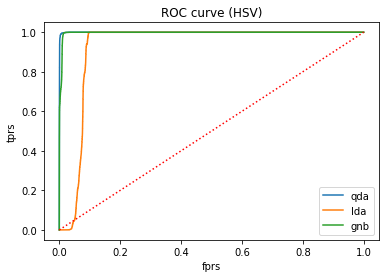

In [7]:
data_frame_HSV = pd.DataFrame()

for i in range(len(names)):
    row, fprs, tprs, thds = analize(cls[i], names[i], train_hsv, train_lbl, test_hsv, test_lbl)
    data_frame_HSV = pd.concat([data_frame_HSV, row])

plt.plot([0, 1], [0, 1], ':r')
plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (HSV)')
plt.legend(loc = 'best')
plt.show()

We can consult here all stored data, in data frame format. We can clearly see that, with this data, ${\it qda}$ is the best classifier again.

Nevertheless, we can see that classifiers get different results with HSV format (${\it gnb}$ has a huge improvement).

In [8]:
data_frame_HSV

,auc,f1,fnr,fpr,precision,tnr,tpr
qda,0.999463,0.990742,0.003141,0.017297,0.989781,0.982703,0.996859
lda,0.927343,0.887017,0.000000,0.290252,0.854874,0.709748,1.000000
gnb,0.997003,0.981483,0.001147,0.052825,0.973014,0.947175,0.998853
